In [319]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [320]:
# Save file path to variable
sales_csv = Path("../data_frames/average_median_sale_price_by_quarter.csv")

# Read with Pandas
sales_df = pd.read_csv(sales_csv)
sales_df.head()

,Unnamed: 0,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,...,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1
0,Zip Code: 98101,632000,480167,503150,499833,578000,531667,421683,473167,697667,...,863425,942889,745000,631167,646454,538833,658333,652128,600278,850000
1,Zip Code: 98102,478400,469706,472678,510033,481990,563115,574748,713090,588084,...,1033128,1118357,1077755,1052790,991762,971769,1000496,1043535,1071667,829414
2,Zip Code: 98103,396300,440550,407155,394756,408807,449780,443280,459820,472632,...,788623,847252,875080,868017,905467,851765,938605,942392,912098,880175
3,Zip Code: 98104,324833,302212,206200,246000,301667,354000,311833,491003,770344,...,562483,393975,420808,419158,376642,415892,413967,408892,381217,453400
4,Zip Code: 98105,458600,508259,500059,483693,441060,504517,541387,491943,533933,...,899382,1026050,1227836,1190863,1051495,975626,1057597,985137,931402,1015833


In [321]:
sales_df.columns

Index(['Unnamed: 0', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
       '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
       '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
       '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4',
       '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3',
       '2023Q4', '2024Q1'],
      dtype='object')

In [322]:
sales_df = sales_df[['Unnamed: 0','2018Q1', '2018Q2',
       '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
       '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4',
       '2022Q1', '2022Q2', '2022Q3', '2022Q4',]]
sales_df.head()

,Unnamed: 0,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,...,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
0,Zip Code: 98101,798633,784300,753333,778850,712483,639000,705417,656067,587417,...,812367,682636,675500,633417,665332,863425,942889,745000,631167,646454
1,Zip Code: 98102,1061160,1123953,1099862,1154782,994948,904183,912748,987686,976643,...,1050193,1035250,931803,991560,1445086,1033128,1118357,1077755,1052790,991762
2,Zip Code: 98103,784596,832872,826282,758228,757417,768683,764391,730155,756017,...,779648,739083,763935,835932,840817,788623,847252,875080,868017,905467
3,Zip Code: 98104,556133,664800,701333,404000,579833,663975,599667,529000,578333,...,625000,518750,562333,620617,582379,562483,393975,420808,419158,376642
4,Zip Code: 98105,830869,928014,910872,889047,833879,818875,945965,833618,795855,...,934495,903188,882166,912276,930376,899382,1026050,1227836,1190863,1051495


In [323]:
sales_df['Unnamed: 0'] = sales_df['Unnamed: 0'].str.replace(r'[^0-9]', '', regex=True)

In [324]:
sales_df.head()

,Unnamed: 0,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,...,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
0,98101,798633,784300,753333,778850,712483,639000,705417,656067,587417,...,812367,682636,675500,633417,665332,863425,942889,745000,631167,646454
1,98102,1061160,1123953,1099862,1154782,994948,904183,912748,987686,976643,...,1050193,1035250,931803,991560,1445086,1033128,1118357,1077755,1052790,991762
2,98103,784596,832872,826282,758228,757417,768683,764391,730155,756017,...,779648,739083,763935,835932,840817,788623,847252,875080,868017,905467
3,98104,556133,664800,701333,404000,579833,663975,599667,529000,578333,...,625000,518750,562333,620617,582379,562483,393975,420808,419158,376642
4,98105,830869,928014,910872,889047,833879,818875,945965,833618,795855,...,934495,903188,882166,912276,930376,899382,1026050,1227836,1190863,1051495


In [325]:
sales_df2 = sales_df.set_index('Unnamed: 0' , inplace=False)
sales_df2 = sales_df2.rename_axis('zip_code')


In [326]:
sales_df2.head()


,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
zip_code,,,,,,,,,,,,,,,,,,,,
98101,798633,784300,753333,778850,712483,639000,705417,656067,587417,641642,812367,682636,675500,633417,665332,863425,942889,745000,631167,646454
98102,1061160,1123953,1099862,1154782,994948,904183,912748,987686,976643,1033230,1050193,1035250,931803,991560,1445086,1033128,1118357,1077755,1052790,991762
98103,784596,832872,826282,758228,757417,768683,764391,730155,756017,748912,779648,739083,763935,835932,840817,788623,847252,875080,868017,905467
98104,556133,664800,701333,404000,579833,663975,599667,529000,578333,620650,625000,518750,562333,620617,582379,562483,393975,420808,419158,376642
98105,830869,928014,910872,889047,833879,818875,945965,833618,795855,881382,934495,903188,882166,912276,930376,899382,1026050,1227836,1190863,1051495


In [327]:
relevant_zipcodes = ["98105",
 "98115",
 "98103",
 "98133",
 "98125",
 "98122",
 "98117",
 "98109",
 "98144",
 "98107",
 "98116",
 "98119",
 "98199",
 "98102",
 "98121",
 "98101"]
sales_df3 = sales_df2[sales_df2.index.isin(relevant_zipcodes)]

In [328]:
filtered_df.head()

,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
zip_code,,,,,,,,,,,,,,,,,,,,
98101,798633,784300,753333,778850,712483,639000,705417,656067,587417,641642,812367,682636,675500,633417,665332,863425,942889,745000,631167,646454
98102,1061160,1123953,1099862,1154782,994948,904183,912748,987686,976643,1033230,1050193,1035250,931803,991560,1445086,1033128,1118357,1077755,1052790,991762
98103,784596,832872,826282,758228,757417,768683,764391,730155,756017,748912,779648,739083,763935,835932,840817,788623,847252,875080,868017,905467
98105,830869,928014,910872,889047,833879,818875,945965,833618,795855,881382,934495,903188,882166,912276,930376,899382,1026050,1227836,1190863,1051495
98107,815457,842200,815707,830118,784749,814238,747623,731978,767860,790482,772970,779230,781223,877133,831475,836380,933493,981430,888598,763613


In [329]:
# Create the X and Y axis lists

x_axis_data = sales_df3.columns

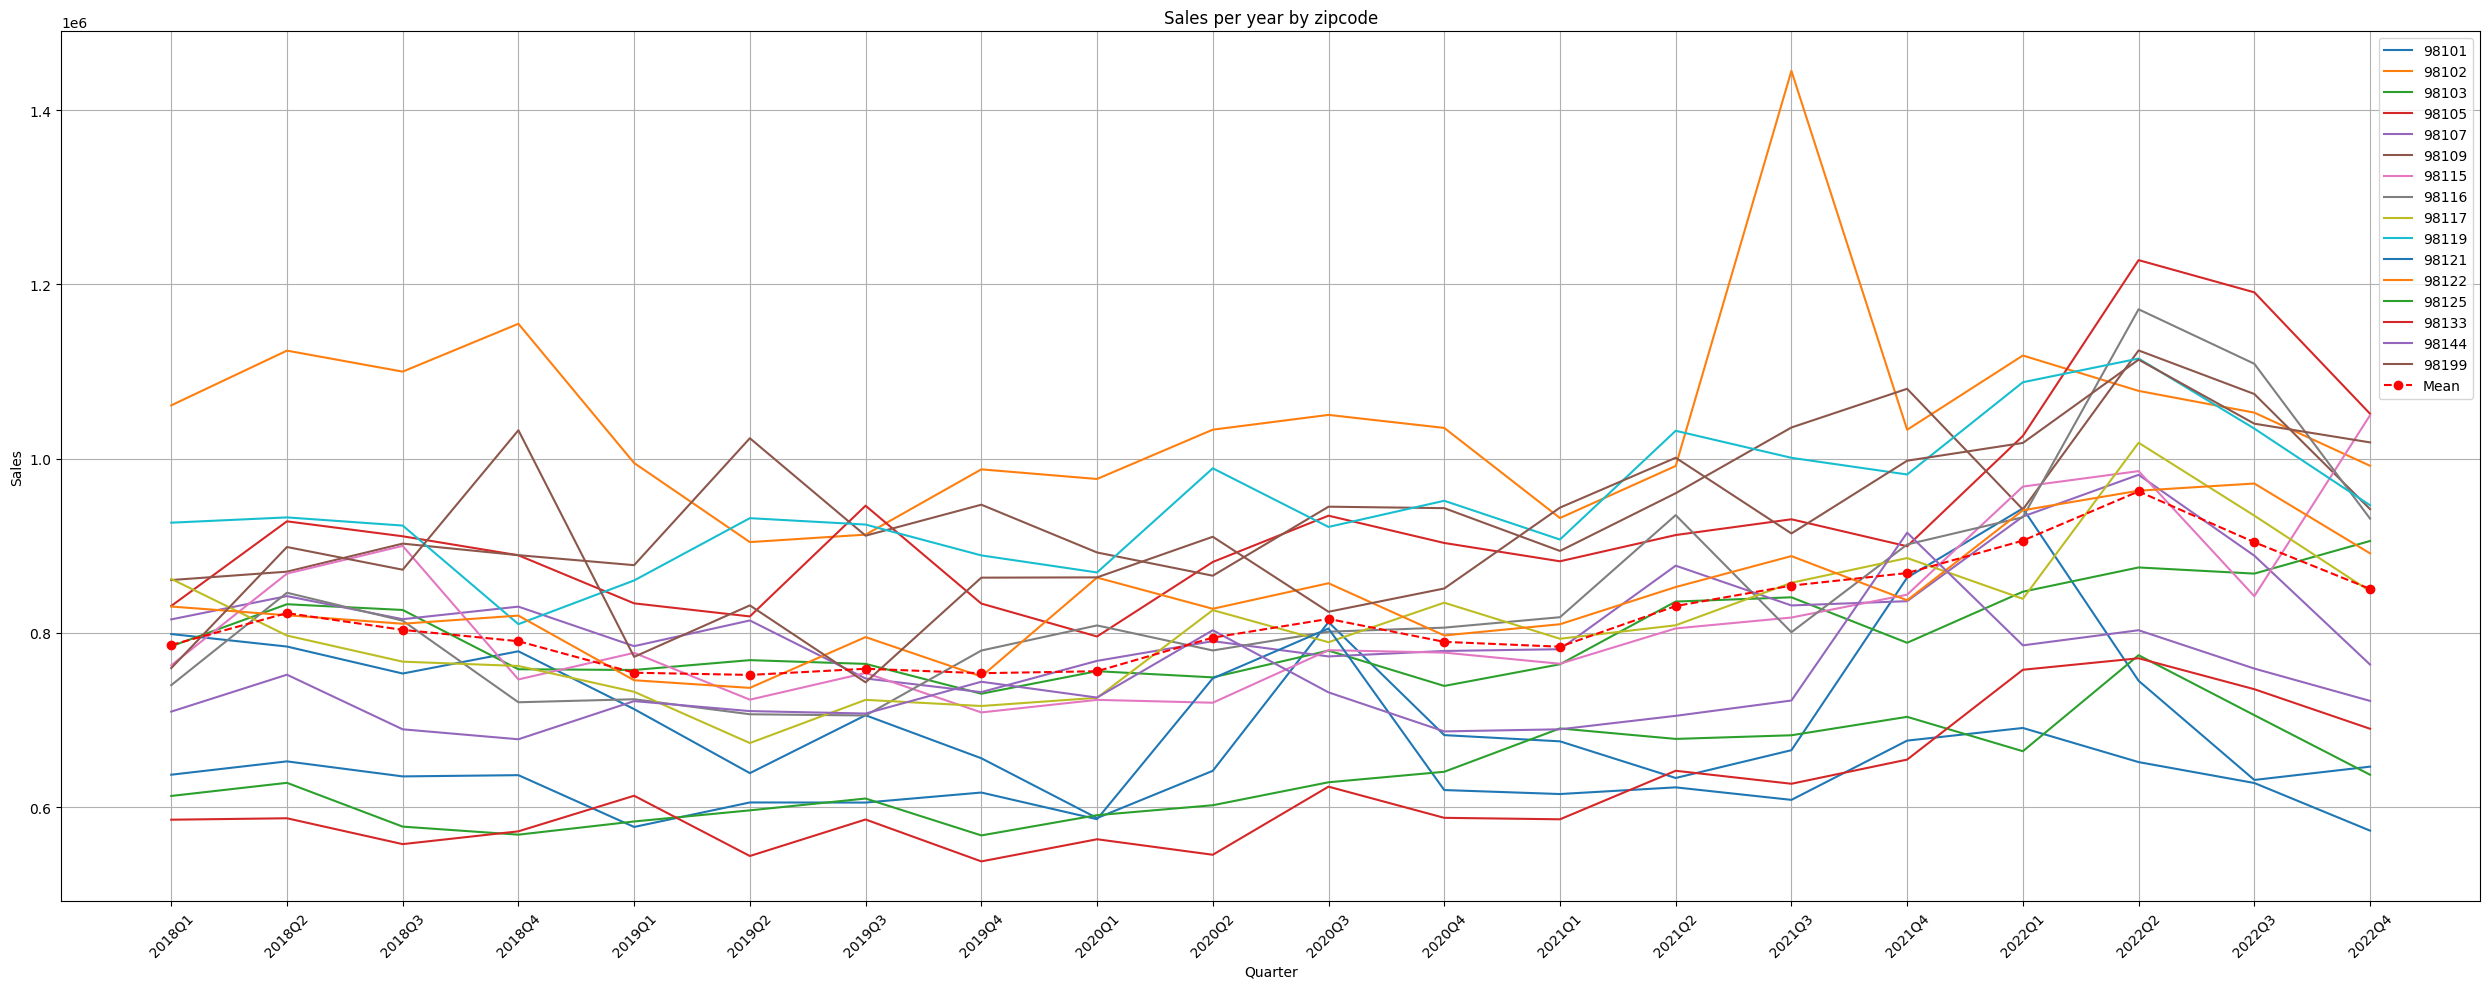

In [330]:
# Plotting
plt.figure(figsize=(25, 10))
for row in sales_df3.index:
    y_axis_data = sales_df3.loc[row,:]
    plt.plot(x_axis_data, y_axis_data, label=row)
mean_values = sales_df3.mean()
plt.plot(mean_values.index, mean_values, color='red', linestyle='--', marker='o', label='Mean')
# Add labels and legend
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Sales per year by zipcode')
plt.legend()
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [294]:
# get average sales by year
sales_df3.loc["avg_sales_year"]  = sales_df3.mean()
sales_df3.tail()

/var/folders/mz/4_h7x0qd2c59896xpbx0tk2r0000gn/T/ipykernel_4085/1481489314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df3.loc["avg_sales_year"]  = sales_df3.mean()


,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
zip_code,,,,,,,,,,,,,,,,,,,,
98125,612810.000,627866.0,577600.0000,568375.000,583508.0000,596277.0000,609847.0000,567510.00,590748.00,602143.000,628501.0000,640551.0000,690308.00,6.782680e+05,682467.0000,703610.0000,664150.000,774355.000,7.055480e+05,6.371540e+05
98133,585549.000,587188.0,557510.0000,572200.000,613037.0000,543877.0000,585785.0000,537677.00,563113.00,545299.000,623480.0000,587700.0000,586002.00,6.417000e+05,626800.0000,654545.0000,757650.000,770846.000,7.353250e+05,6.899210e+05
98144,709598.000,751986.0,689297.0000,677859.000,721670.0000,710206.0000,707411.0000,743890.00,725739.00,802997.000,731713.0000,686907.0000,689307.00,7.047630e+05,722350.0000,914993.0000,785663.000,803035.000,7.590000e+05,7.219080e+05
98199,759545.000,898555.0,872484.0000,1032568.000,772458.0000,831543.0000,743221.0000,863370.00,863693.00,910304.000,824200.0000,850942.0000,943737.00,1.000997e+06,914107.0000,997606.0000,1018017.000,1113617.000,1.040113e+06,1.018628e+06
avg_sales_year,786084.625,822715.5,803443.4375,790411.875,754256.8125,751723.5625,758805.1875,753689.75,755958.25,794505.625,816042.5625,789678.5625,784112.75,8.307803e+05,854234.1875,868661.3125,905881.625,962381.875,9.040404e+05,8.504919e+05


In [295]:
#get avg sales by zip code

sales_df3['avg_sales_zipcode'] = sales_df3.mean(axis=1)
#plt.plot(average_by_zipcode.index, average_by_zipcode.values, 'r-', linewidth=3, label='Average')
sales_df3.head()

/var/folders/mz/4_h7x0qd2c59896xpbx0tk2r0000gn/T/ipykernel_4085/667951788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df3['avg_sales_zipcode'] = sales_df3.mean(axis=1)


,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,...,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,avg_sales_zipcode
zip_code,,,,,,,,,,,,,,,,,,,,,
98101,798633.0,784300.0,753333.0,778850.0,712483.0,639000.0,705417.0,656067.0,587417.0,641642.0,...,682636.0,675500.0,633417.0,665332.0,863425.0,942889.0,745000.0,631167.0,646454.0,717766.45
98102,1061160.0,1123953.0,1099862.0,1154782.0,994948.0,904183.0,912748.0,987686.0,976643.0,1033230.0,...,1035250.0,931803.0,991560.0,1445086.0,1033128.0,1118357.0,1077755.0,1052790.0,991762.0,1048843.95
98103,784596.0,832872.0,826282.0,758228.0,757417.0,768683.0,764391.0,730155.0,756017.0,748912.0,...,739083.0,763935.0,835932.0,840817.0,788623.0,847252.0,875080.0,868017.0,905467.0,798570.35
98105,830869.0,928014.0,910872.0,889047.0,833879.0,818875.0,945965.0,833618.0,795855.0,881382.0,...,903188.0,882166.0,912276.0,930376.0,899382.0,1026050.0,1227836.0,1190863.0,1051495.0,931325.15
98107,815457.0,842200.0,815707.0,830118.0,784749.0,814238.0,747623.0,731978.0,767860.0,790482.0,...,779230.0,781223.0,877133.0,831475.0,836380.0,933493.0,981430.0,888598.0,763613.0,819297.85


In [296]:

sales_df3.describe()

,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,...,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,avg_sales_zipcode
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,17.000000,17.000000,17.000000,1.700000e+01,...,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,7.860846e+05,8.227155e+05,8.034434e+05,7.904119e+05,754256.812500,7.517236e+05,758805.187500,753689.750000,755958.250000,7.945056e+05,...,7.896786e+05,784112.750000,8.307803e+05,8.542342e+05,8.686613e+05,9.058816e+05,9.623819e+05,9.040404e+05,8.504919e+05,8.168950e+05
std,1.154610e+05,1.261310e+05,1.358036e+05,1.491113e+05,105252.784117,1.267152e+05,110836.722767,123424.233169,120533.452695,1.263696e+05,...,1.239650e+05,107309.686602,1.347565e+05,1.958632e+05,1.185368e+05,1.283088e+05,1.681962e+05,1.698168e+05,1.523057e+05,1.206012e+05
min,5.855490e+05,5.871880e+05,5.575100e+05,5.683750e+05,577213.000000,5.438770e+05,585785.000000,537677.000000,563113.000000,5.452990e+05,...,5.877000e+05,586002.000000,6.226670e+05,6.083000e+05,6.545450e+05,6.641500e+05,6.516670e+05,6.276670e+05,5.730000e+05,6.182602e+05
25%,7.399660e+05,7.843000e+05,7.533330e+05,7.203430e+05,721670.000000,6.735430e+05,705417.000000,708689.000000,723101.000000,7.477860e+05,...,6.869070e+05,690308.000000,7.047630e+05,7.223500e+05,8.363800e+05,8.390820e+05,8.030350e+05,7.590000e+05,7.219080e+05,7.380146e+05
50%,7.860846e+05,8.328720e+05,8.140050e+05,7.788500e+05,754256.812500,7.368630e+05,747623.000000,743890.000000,756017.000000,7.945056e+05,...,7.896786e+05,784112.750000,8.359320e+05,8.408170e+05,8.686613e+05,9.334930e+05,9.814300e+05,9.040404e+05,8.912440e+05,8.168950e+05
75%,8.308690e+05,8.702470e+05,8.998430e+05,8.301180e+05,784749.000000,8.188750e+05,795140.000000,833618.000000,863442.000000,8.656080e+05,...,8.509420e+05,882166.000000,9.351270e+05,9.141070e+05,9.149930e+05,9.679190e+05,1.113617e+06,1.040113e+06,9.464820e+05,9.134852e+05
max,1.061160e+06,1.123953e+06,1.099862e+06,1.154782e+06,994948.000000,1.023402e+06,945965.000000,987686.000000,976643.000000,1.033230e+06,...,1.035250e+06,943737.000000,1.031950e+06,1.445086e+06,1.080148e+06,1.118357e+06,1.227836e+06,1.190863e+06,1.051495e+06,1.048844e+06


In [303]:
# Add the linear regression equation and line to plot

x_values = sales_df3.index
y_values = sales_df3.loc[:'avg_sales_zipcode']
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Build scatter plot for year vs inventory
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, c="blue", alpha = .5)
# Incorporate the other graph properties2
plt.title("Average sales of Houses For-Sale 2018-2022")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)

plt.annotate(line_eq, (2019,45),fontsize=15,color="red")
plt.xlim(2017, 2023)
plt.ylim(35, 65)
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [306]:
sales_df4 = sales_df3['avg_sales_zipcode']
sales_df4



zip_code
98101             7.177664e+05
98102             1.048844e+06
98103             7.985703e+05
98105             9.313252e+05
98107             8.192978e+05
98109             9.490185e+05
98115             8.158524e+05
98116             8.415383e+05
98117             8.096668e+05
98119             9.517006e+05
98121             6.395017e+05
98122             8.403982e+05
98125             6.370798e+05
98133             6.182602e+05
98144             7.380146e+05
98199             9.134852e+05
avg_sales_year    8.168950e+05
Name: avg_sales_zipcode, dtype: float64

In [305]:
sales_df4.describe()



count    1.700000e+01
mean     8.168950e+05
std      1.206012e+05
min      6.182602e+05
25%      7.380146e+05
50%      8.168950e+05
75%      9.134852e+05
max      1.048844e+06
Name: avg_sales_zipcode, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


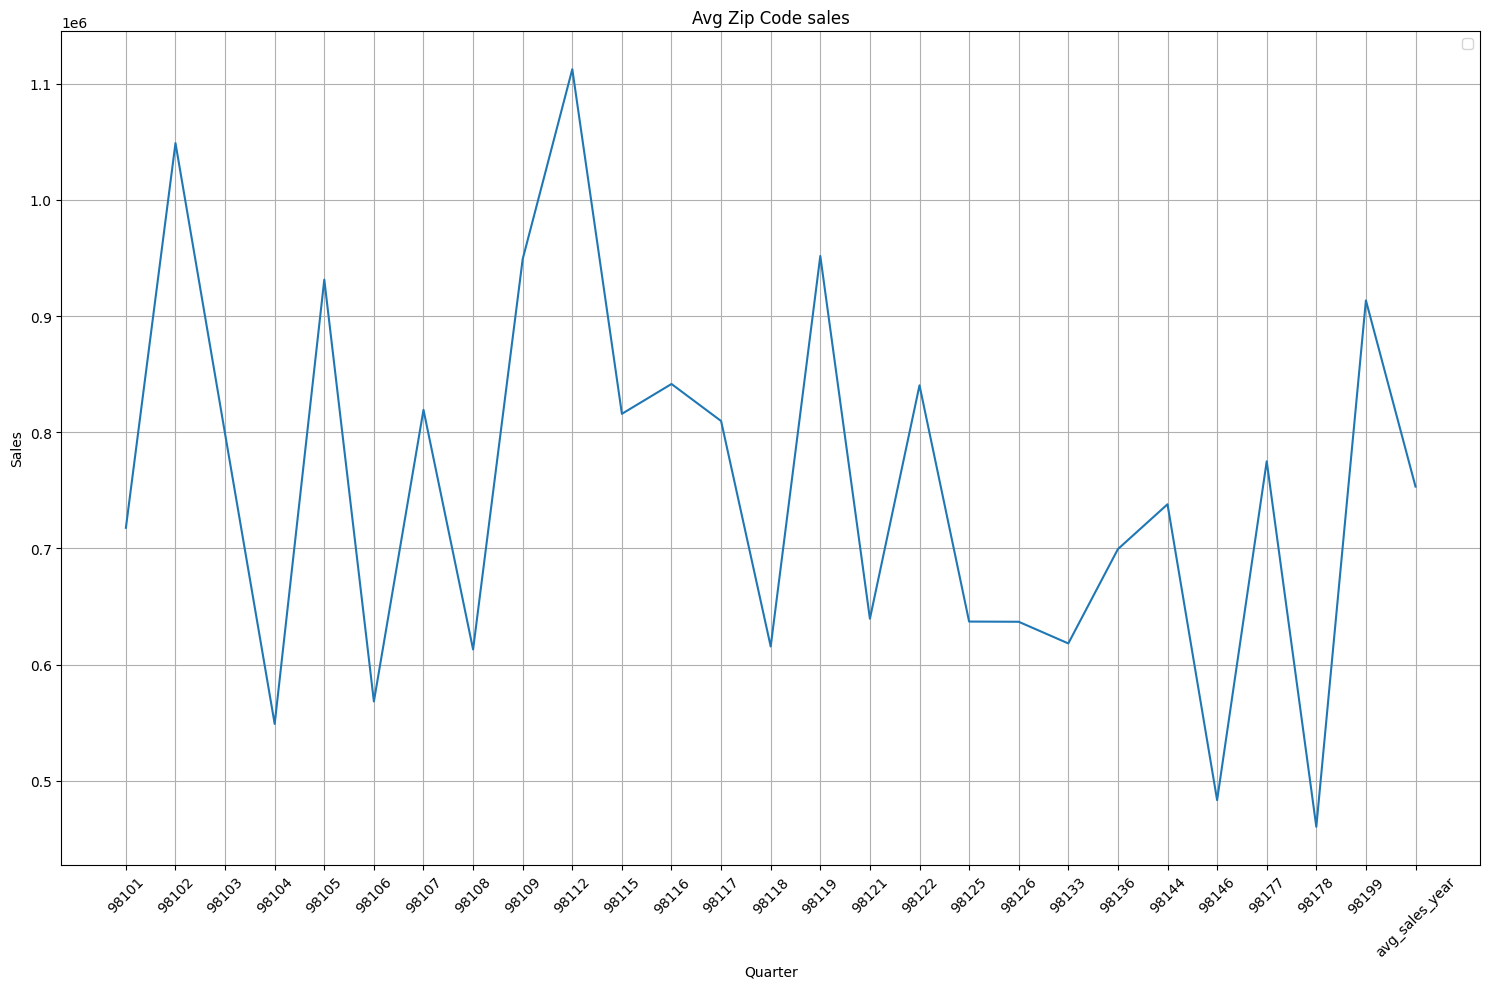

In [265]:
plt.figure(figsize=(15, 10))
#sales_df4.plot()
plt.plot(sales_df4.index, sales_df4)
#mean_values = sales_df3.mean()
#plt.plot(mean_values.index, mean_values, color='red', linestyle='--', marker='o', label='Mean')
# Add labels and legend
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Avg Zip Code sales')
plt.legend()
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()